# Question 3B: 4-step Adams-Bashforth Methods

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = x^2 -2e^{-2x} $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 1.5 $

Step Size $ h = 0.25 $

Actual Solution $ y(x) = \frac{x^3}{3} + e^{-2x} $





In [7]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [8]:
def myfun_xy(x,y):
    return (x**2 - 2*math.exp(-2*x))


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 1.5 $.
### Interval
The step Size will be $h = 0.25$

with the discrete time steps,
$$ x_{i} = 0 + i0.25 $$
for  $i=0,1,...,6$.

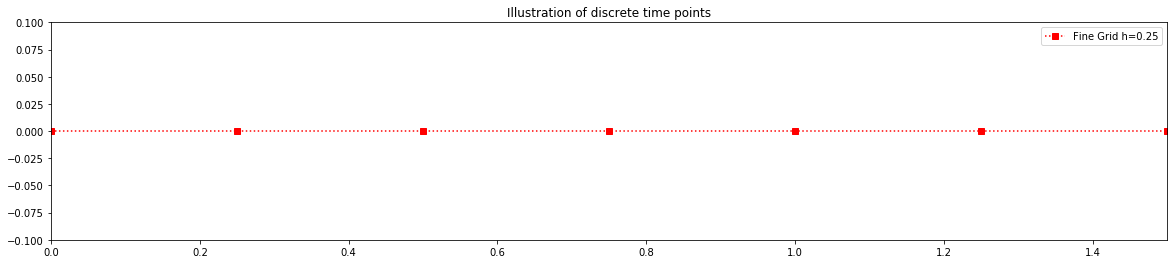

In [9]:
# Start and end of interval
b=1.5
a=0
# Steps N1=400
N1=6
#N2=200
h1=0.25
#h2=0.05

x1=np.arange(a,b+h1,h1)
#x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))
#plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,1.5))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

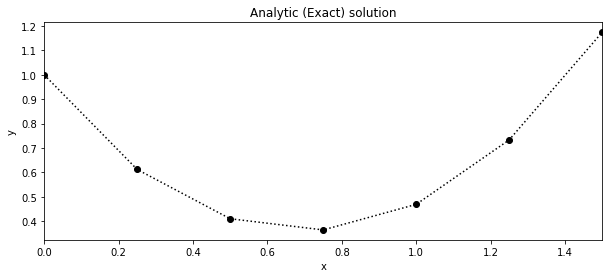

In [10]:
## Analytic Solution y
y1= np.exp(-2*x1) + x1**3/3


fig = plt.figure(figsize=(10,4))
plt.plot(x1,y1,'o:',color='black')

plt.xlim((0,1.5))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 1 $$

In [11]:
# Initial Condition
IC=1
w1=np.zeros(N1+1)
w1[0]=IC
w1[1]=y1[1]
w1[2]=y1[2]
w1[3]=y1[3]

w2=np.zeros(N1+1)
w2[0]=IC
w2[1]=0.5
w2[2]=0.327
w2[3]=0.292



## 2-step Adams Bashforth

The general 2-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(3f(x_i,w_i)-f(x_{i-1},w_{i-1})). $$

for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(3f(x_0,w_0)-f(x_{-1},w_{-1})), $$
this is not solvable as <font color='red'> $w_{-1}$ </font>is unknown.
for $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(3f(x_1,w_1)-f(x_{0},w_{0})), $$
this is not solvable as <font color='red'> $w_{1}$ </font>is unknown, but it can be approximated using a one step method.
Here, as the exact solution is known,
$$w_1=\frac{20}{1 + 19e^{\frac{-x}{4}}}$$




## 3-step Adams Bashforth

The general 3-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{12}(23f(x_i,w_i)-16f(x_{i-1},w_{i-1})+5f(x_{i-2},w_{i-2})). $$


for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{12}(23f(x_0,w_0)-16f(x_{-1},w_{-1})+5f(x_{-2},w_{-2})), $$
this is not solvable as <font color='red'> $w_{-1}$  and $w_{-2}$</font>is unknown.
for $i=1$ the difference equation is:
$$w_{3} = w_{2} + \frac{h}{12}(23f(x_{2},w_{2})-16f(x_{1},w_{1})+5f(x_{0},w_{0}), $$
this is not solvable as <font color='red'> $w_{1}$ and $w_{2}$ </font> are unknown, but it can be approximated using a one step method.
Here, as the exact solution is known,
$$w_1=\frac{20}{1 + 19e^{\frac{-x}{4}}}$$

Text(0.5, 1.0, 'Analytic and AB2 & AB3 Methods solution')

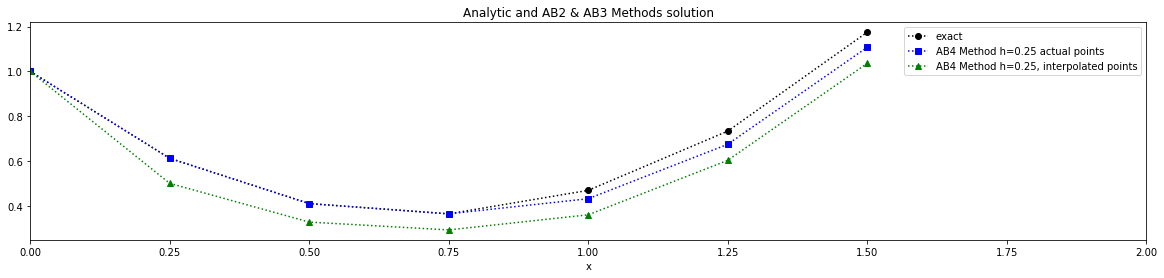

In [17]:
for k in range (3,N1):
    w1[k+1]=w1[k]+h1/24.0*(55*myfun_xy(x1[k],w1[k])-59*myfun_xy(x1[k-1],w1[k-1]) +37*myfun_xy(x1[k-2],w1[k-2]) -7*myfun_xy(x1[k-3],w1[k-3])) 
    
for k in range (3,N1):
    w2[k+1]=w2[k]+h1/24.0*(55*myfun_xy(x1[k],w2[k])-59*myfun_xy(x1[k-1],w2[k-1]) +37*myfun_xy(x1[k-2],w2[k-2]) -7*myfun_xy(x1[k-3],w2[k-3]))
    

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='AB4 Method h=0.25 actual points')
plt.plot(x1,w2,'^:',color='green',label='AB4 Method h=0.25, interpolated points')

plt.xlim((0,2))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and AB2 & AB3 Methods solution')


In [16]:
table = ListTable()
table.append(['x', 'w1 AB2 h=0.01', 'w2 AB3 h=0.01','Exact',
              'AB2 Err 0.01', '% Err AB2 0.01',
             'AB3 Err 0.01', '% Err AB3 0.01'])
tableSize = 6
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(w2[i],5), round(y1[i],5),
                  round(abs(y1[i]-w1[i]),8), 
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5),
                 round(abs(y1[i]-w2[i]),8), 
                 round(abs(y1[i]-w2[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' , ' '
              , round(max(abs(y1-w1)),8) ,' ', round(max(abs(y1-w2)),8)])
table

[['x',
  'w1 AB2 h=0.01',
  'w2 AB3 h=0.01',
  'Exact',
  'AB2 Err 0.01',
  '% Err AB2 0.01',
  'AB3 Err 0.01',
  '% Err AB3 0.01'],
 [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.25, 0.61174, 0.5, 0.61174, 0.0, 0.0, 0.11173899, 18.2658],
 [0.5, 0.40955, 0.327, 0.40955, 0.0, 0.0, 0.08254611, 20.15551],
 [0.75, 0.36376, 0.292, 0.36376, 0.0, 0.0, 0.07175516, 19.72622],
 [1.0, 0.43128, 0.35952, 0.46867, 0.03739067, 7.97806, 0.10914583, 23.28849],
 [1.25, 0.67436, 0.6026, 0.73313, 0.05876717, 8.01596, 0.13052233, 17.80352],
 [1.5, 1.10747, 1.03572, 1.17479, 0.0673141, 5.7299, 0.13906926, 11.83783],
 ['Max', ' ', ' ', ' ', 0.0673141, ' ', 0.13906926]]